In [14]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import re

In [66]:
def image_name_to_label(image_name):
    image_name_str = str(image_name)
    well_name_re = re.search(r'([B-G]\d{1,2})',image_name_str)


    return well_name_re[0]


In [ ]:
labels_control = ['B2','C2','D2','E2','F2','G2']
# labels_group_1 = [  ]



In [71]:
path_nuclei = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_Nucleus_filtered.csv"
path_focii = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_H2AX_in_nucleus.csv"
path_image_data = "C:/Users/Modern/Desktop/Kirill/Counted/MyExpt_Image.csv"

nuclei_pd=pd.read_csv(path_nuclei)
focii_pd=pd.read_csv(path_focii)
image_data_pd=pd.read_csv(path_image_data)

labels_nuclei = nuclei_pd.head()
labels_focii = focii_pd.head()
labels_image_data = image_data_pd.head()

print(labels_nuclei)


   ImageNumber  ObjectNumber  AreaShape_Area  AreaShape_FormFactor  \
0            1             1            5208              0.817290   
1            1             2            4510              0.798877   
2            3             1            5570              0.857737   
3            3             2            6328              0.721665   
4            3             3            6427              0.779539   

   Children_Masked_H2AX_Count  Location_Center_X  Location_Center_Y  \
0                           6         535.430492         350.460253   
1                          15         434.543902         970.905100   
2                          31         327.032855         163.516338   
3                          58         300.179362         343.307364   
4                          22        1080.051968         401.319745   

   Location_Center_Z  Number_Object_Number  Parent_Nucleus  
0                  0                     1               1  
1                  0          

In [77]:
labels = labels_image_data['FileName_Dapi'].apply(image_name_to_label)
labels_df = pd.DataFrame(labels)
labels_df = labels_df.join(image_data_pd['ImageNumber'])


  FileName_Dapi  ImageNumber
0            B2            1
1            B3            2
2            B4            3
3            B5            4
4            B6            5


In [74]:
nuclei_pd.merge(labels_df[['FileName_Dapi','ImageNumber']],'left')

KeyError: "['ImageNumber'] not in index"

[Text(0.5, 0, 'Number per nucleus'), Text(0, 0.5, 'Count')]

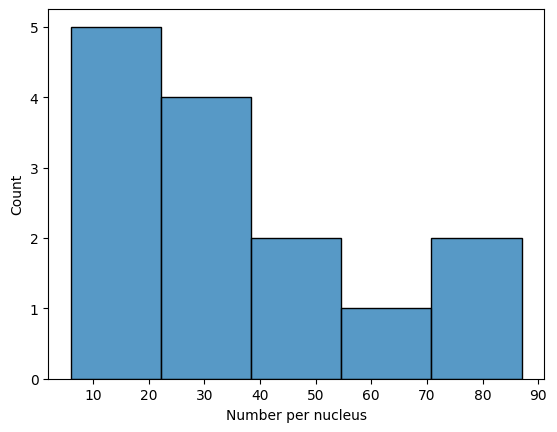

In [11]:
ax = sns.histplot(data=nuclei_pd, x =nuclei_pd['Children_Masked_H2AX_Count'])
ax.set(xlabel='Number per nucleus', ylabel='Count')

[Text(0.5, 0, 'Number per nucleus'), Text(0, 0.5, 'Nucleus area')]

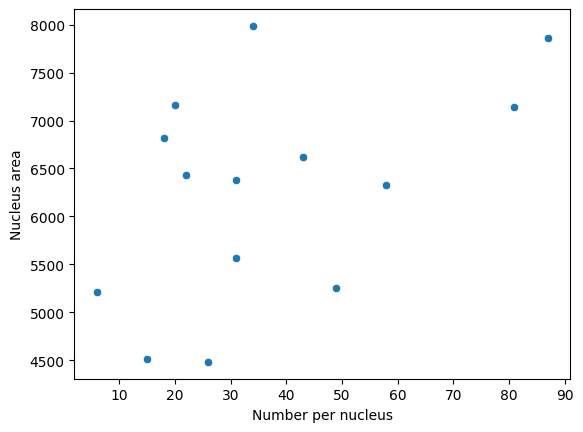

In [12]:
ax = sns.scatterplot(data=nuclei_pd, x = nuclei_pd['Children_Masked_H2AX_Count'], y = nuclei_pd['AreaShape_Area'] )
ax.set(xlabel='Number per nucleus', ylabel='Nucleus area')